In [58]:
import cv2
import numpy as np
from keras.api.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

In [59]:

def print_image(image, label=None):
    #plt.imshow(image, cmap='gray')  # Display the image in grayscale
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Hide axes
    plt.title("Preprocessed Image")  # Optional title
    plt.show()  # Show the image

In [60]:

def preprocess_image(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    print_image(img)
    img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)[1]  # Invert and binarize
    print_image(img)
    return img

In [61]:

def find_contours(img):
    # Find contours in the image
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

In [62]:

def split_into_sentences(img):
    # Find vertical contours to split the image into sentences
    vertical_lines = img.sum(axis=0)  # Sum columns
    sentences = []
    
    # Create a threshold to identify sentences based on vertical sums
    threshold = np.mean(vertical_lines) * 0.5
    sentence_start = None

    for x in range(len(vertical_lines)):
        if vertical_lines[x] < threshold:
            if sentence_start is not None:
                # End of a sentence
                sentences.append(img[:, sentence_start:x])
                sentence_start = None
        else:
            if sentence_start is None:
                sentence_start = x
                
    return sentences

In [63]:

def split_into_words(sentence_img):
    # Find horizontal contours to split the sentence into words
    horizontal_lines = sentence_img.sum(axis=1)  # Sum rows
    words = []
    
    threshold = np.mean(horizontal_lines) * 0.5
    word_start = None

    for y in range(len(horizontal_lines)):
        if horizontal_lines[y] < threshold:
            if word_start is not None:
                # End of a word
                words.append(sentence_img[word_start:y, :])
                word_start = None
        else:
            if word_start is None:
                word_start = y
                
    return words

In [64]:

def split_into_digits(word_img):
    # Find contours to split the word into digits
    digit_contours = find_contours(word_img)
    digits = []

    for contour in digit_contours:
        x, y, w, h = cv2.boundingRect(contour)
        digit_img = word_img[y:y + h, x:x + w]
        digits.append(digit_img)
        
    return digits

In [65]:

def predict_digits(digits, model):
    predictions = []
    
    for digit_img in digits:
        digit_img = cv2.resize(digit_img, (28, 28))  # Resize to model input
        digit_img = digit_img / 255.0  # Normalize
        digit_img = digit_img.reshape(1, 28, 28, 1)  # Reshape for model
        
        prediction = model.predict(digit_img)
        predicted_digit = np.argmax(prediction)  # Get the predicted digit
        predictions.append(predicted_digit)
        
    return predictions

In [66]:

def process_image(image_path, model):
    img = preprocess_image(image_path)
    
    sentences = split_into_sentences(img)
    full_predictions = []
    
    for sentence in sentences:
        words = split_into_words(sentence)
        for word in words:
            digits = split_into_digits(word)
            predictions = predict_digits(digits, model)
            full_predictions.append(predictions)
    
    # Combine and print predictions
    for sentence_preds in full_predictions:
        print(''.join(map(str, sentence_preds)))

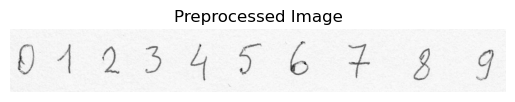

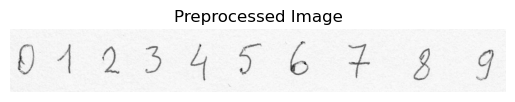

[array([[  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0],


In [69]:

# Load your trained model
model = load_model('mnist_model2.keras')

# Path to the image containing multiple digits
image_path = './test_image/scan_smoothing_0.png'
img = preprocess_image(image_path)
split_into_sentences(img)

#process_image(image_path, model)
